# **Question 1 Code**

Text(0, 0.5, 't')

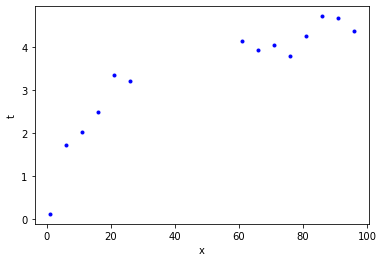

In [6]:
# Data loader - DO NOT MODIFY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('assignment1.csv').to_numpy()
x = df[:,1].reshape((-1,1))
t = df[:,2].reshape((-1,1))
# x and t are 2d arrays of shape (N,1) where N is the number of data points
plt.figure()
plt.plot(x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')

Order & Train & Valid \\
0 & 1.343 & 1.377
1 & 0.548 & 0.949
2 & 0.411 & 0.753
3 & 0.178 & 0.517
4 & 0.118 & 0.869
5 & 0.030 & 1.376
6 & 0.000 & 1.945
7 & 0.000 & 1.273


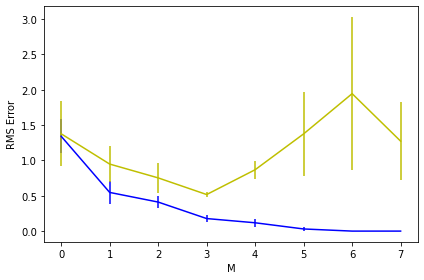

In [57]:
# 0  1  2  3  4  5  6  7  8  9  10  11  12  13 (x points)
# V  V  T  V  V  T  V  V  T  V  V   T   V   V  (validation/test)
#10pts for validation and 4pts for test

# the combined data for cross-validation 10 pts: 0, 1, 3, 4, 6, 7, 9, 10, 12, 13
xtrainval = np.concatenate((x.flatten()[0::3], x.flatten()[1::3]), axis=0)
ttrainval = np.concatenate((t.flatten()[0::3], t.flatten()[1::3]), axis=0)
# a test set of 4 pts: 2, 5, 8, 11
xtest = x[2::3].flatten()
ttest = t[2::3].flatten()

# We now split the dataset into three random folds

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:3], trainval[3:7], trainval[7:10] ]

M = [0,1,2,3,4,5,6,7] # max polynomial order set to 7 because the training 
K = 3 # number of folds
rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()

print("Order & Train & Valid \\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")


Training loss = 0.24
Test loss = 0.34

Weight W0: 0.1516342619853427
Weight W1: 0.21627136501189376
Weight W2: -0.0037439002645160177
Weight W3: 2.0622113515072898e-05

Day 1.0: 0.36418234884623546
Day 6.0: 1.3189364190533843
Day 11.0: 2.1050553781982977
Day 16.0: 2.7380058114172807
Day 21.0: 3.2332543038466377
Day 26.0: 3.6062674406226742
Day 31.0: 3.872511806881693
Day 36.0: 4.04745398776
Day 41.0: 4.1465605683939
Day 46.0: 4.185298133919698
Day 51.0: 4.179133269473698
Day 56.0: 4.143532560192202
Day 61.0: 4.093962591211521
Day 66.0: 4.0458899476679555
Day 71.0: 4.014781214697811
Day 76.0: 4.0161029774373915
Day 81.0: 4.0653218210230015
Day 86.0: 4.177904330590948
Day 91.0: 4.36931709127753
Day 96.0: 4.655026688219058


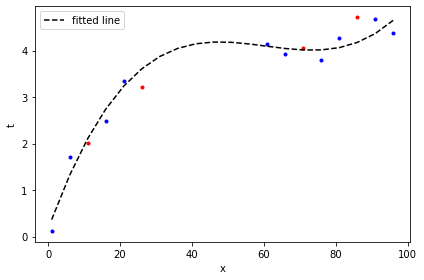

In [8]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
hiPhi = np.array([pow(x.flatten(),j) for j in range(0,polyorder+1)]).transpose()

# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrainval))

# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)

# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain,2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")

# Plot the MLE (including the missing days)
all_x = np.array(sorted([i for i in x.flatten()] + [31.0, 36.0, 41.0, 46.0, 51.0, 56.0]))
all_x_hiPhi = np.array([pow(all_x,j) for j in range(0,polyorder+1)]).transpose()
plot_prediction = np.matmul(all_x_hiPhi,w)
plt.figure()
plt.plot(xtrainval,ttrainval,'b.')
plt.plot(xtest,ttest,'r.')
plt.plot(all_x, plot_prediction, 'k--', label='fitted line')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.legend()

# Print w* weights and estimates for all the days (including missing ones)
print()
for i, v in enumerate(w):
    print(f"Weight W{str(i)}: {v}")
print()
for i, v in enumerate(plot_prediction):
    print(f"Day {all_x[i]}: {str(plot_prediction[i])}")

# **Question 1 Answers**
1.) The optimal polynomial order varies depending on the seed I set. After running repatedly it is clear the optimal degree of polynomial is 3 as it is the most commonly the optimal outcome. It has the lowest validation RMS score (on average). It doesn't have the lowest training RMS score but this shows that it isnt as prone to overfitting as the higher order polynomials.
The optimal weight parameters (w*) to 3dp are: 
* w0 = 0.152 
* w1 = 0.216 
* w2 = -0.004 
* w3 = 2.062e - 0.5
2.) The fitted line can be seen above for all the days(including the predicted values).This plot appears to represent the data well. This can be demonstrated by the relatively low Training and Validation losses.
I also believe this model generalises well to unseen data. This can be seen by the Training loss (0.24) and the Test loss (0.34). The loss on the test set is very similar to the loss on the validation set and so we can have confidence that the model is able to generalise to data that was not used in its optimisation.

3.) The estimates of t for the missing values of x to 3dp are:
* day 31: 3.873
* day 36: 4.047
* day 41: 4.147
* day 46: 4.185
* day 51: 4.179
* day 56: 4.144

# **Question 2 Code**

MLE:
Weight W0: 0.1516342619853427
Weight W1: 0.21627136501189376
Weight W2: -0.0037439002645160177
Weight W3: 2.0622113515072898e-05

mN Values:
Mean M0: 0.23974610138703945
Mean M1: 0.19605384662343128
Mean M2: -0.003275567353195046
Mean M3: 1.794723869872941e-05

mN Values when alpha is very close to 0:
Mean M0: 0.24313276453427068
Mean M1: 0.1957660334582445
Mean M2: -0.00326985715738623
Mean M3: 1.7914754487107195e-05

MAP Loss: 0.2531440671959855
MLE Loss: 0.2715938766888809


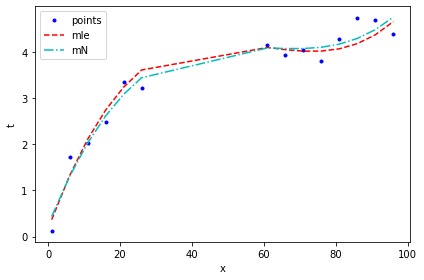

In [33]:
from scipy.stats import multivariate_normal
# Define the parameters
Npts = 14
sigma = 0.1
alpha = 2.0
beta = (1/sigma)**2
wtrue = w
m0 = np.zeros(wtrue.size)
S0 = (1/alpha)*np.eye(wtrue.size)
Phi = np.concatenate((np.ones((Npts,1)),x,pow(x,2),pow(x,3)),axis=1)

# Randomise the data points
sample_indices = np.random.choice(np.linspace(0,Npts-1,Npts).astype(int),size=Npts,replace=False)

N = 14
# Sample the first N points and compute posterior parameters
xsample = np.atleast_2d(x[sample_indices[0:N]])
tsample = np.atleast_2d(t.flatten()[sample_indices[0:N]]).T
Phisample = np.atleast_2d(Phi[sample_indices[0:N]])
invS0 = alpha*np.eye(wtrue.size)
invSN = invS0 + beta*np.matmul(Phisample.T,Phisample)
SN = np.linalg.inv(invSN)
mN = np.squeeze(beta*np.matmul(SN,np.matmul(Phisample.T,tsample)))

# compute the posteriori
posterior = np.random.multivariate_normal(mean=mN,cov=SN)

#compute the MLE and posterior. Then plot them along with the data points
mle = np.matmul(Phi,wtrue)
means = np.matmul(Phi,mN)
plt.figure()
plt.plot(x,t,'b.', label='points')
plt.plot(x,mle,'r--', label='mle')
plt.plot(x,means,'c-.', label='mN')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.axis('auto')
plt.tight_layout()

#change alpha to 0 to see if the posterior will then be identical to the prior
alpha2 = np.finfo(np.float64).tiny
S02 = (1/alpha2)*np.eye(wtrue.size)
invS02 = alpha2*np.eye(wtrue.size)
invSN2 = invS02 + beta*np.matmul(Phisample.T,Phisample)
SN2 = np.linalg.inv(invSN2)
mN2 = np.squeeze(beta*np.matmul(SN2,np.matmul(Phisample.T,tsample)))

# Print MLE and the Mean of the posterior
print("MLE:")
for i, v in enumerate(wtrue):
    print(f"Weight W{str(i)}: {v}")
print()
print("mN Values:")
for i, v in enumerate(mN):
    print(f"Mean M{str(i)}: {v}")
print()
print("mN Values when alpha is very close to 0:")
for i, v in enumerate(mN2):
     print(f"Mean M{str(i)}: {v}")
print()
print(f"MAP Loss: {np.sqrt(np.sum(pow(t.flatten()-means, 2)/x.flatten().size))}")
print(f"MLE Loss: {np.sqrt(np.sum(pow(t.flatten()-mle, 2)/x.flatten().size))}")

# **Question 2 Answers**
1. The values for the mean of the posterior to 3dp are as follows:
* w0 = 0.240
* w1 = 0.196
* w2 = -0.003
* w3 = 1.795
<br>
The values for the MLE to 3dp are as follows:
* w0 = 0.152 
* w1 = 0.216 
* w2 = -0.004 
* w3 = 2.062

2. There isn't a significant difference across the two sets of values and this is demonstrated by the two curves above representing the MLE and the mean. They are very similar in both shape and position. However the two curves do differ slightly around the x=25 and x=80 regions. The mean of the posterior seems to generalise slightly better to the data. Just based off visual inspection it can be seen that the plot is closer to more points and quantatively the loss over the dataset is less than that of MLE (0.253 vs 0.272 respectively).
3. By comparing the equation of the mean of the posterior (MAP) with the maximum likelihood estimation (MLE), the only difference is that MAP includes prior in the formula, which means the likelihood is weighted by the prior in MAP. However when the prior follows a uniform distribution we can simplify the MAP down to the equation for MLE. This concludes that MLE is a special case of MAP, when the prior follows a uniform distribution. <br> This corresponds to a prior of the form S0=α−1I with α→0 (ie the variance of each parameter tending to infinity). With this prior, it can be shown that MAP is given by the MLE (the normal equations). I have tried to demonstrate this by changing alpha to a very small positive number (very close to 0) however the results do not verify this.

# **Question 3 Code**

Day 1.0: 0.43254232789601615
Day 6.0: 1.3020253599715619
Day 11.0: 2.023882539216215
Day 16.0: 2.611574294654023
Day 21.0: 3.0785610553090317
Day 26.0: 3.4383032502052884
Day 61.0: 4.084326811253926
Day 66.0: 4.070687924945838
Day 71.0: 4.070948334095418
Day 76.0: 4.09856846772671
Day 81.0: 4.167008754863761
Day 86.0: 4.289729624530617
Day 91.0: 4.480191505751331
Day 96.0: 4.7518548275499395
Day 101.0: 5.118180018950493
Day 106.0: 5.592627508977044
Day 111.0: 6.188657726653632
Day 116.0: 6.919731101004301
Day 120.0: 7.610866281594343


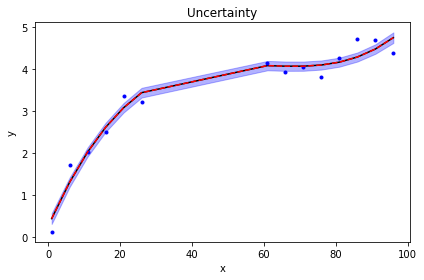

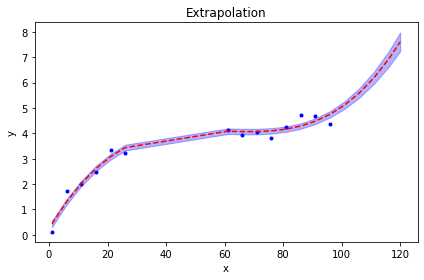

In [32]:
# calculate the variance
sigmasq = (1/beta) + np.diag(np.matmul(Phi,np.matmul(SN,Phi.T)))
plt.figure()
plt.plot(x,means,'k-')
plt.plot(np.squeeze(xsample),np.squeeze(tsample),'b.')
y = np.matmul(Phi,mN)
plt.plot(x,y,'r--')
plt.fill_between(x.flatten(),y-np.sqrt(sigmasq), y+np.sqrt(sigmasq),color='blue',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'{"Uncertainty"}')
plt.tight_layout()

#add the extra days to demonstrate how the model handles extrapolation
extra_days = np.array(sorted([i for i in x.flatten()] + [101.0, 106.0, 111.0, 116.0, 120.0]))
extra_days_hiPhi = np.array([pow(extra_days,j) for j in range(0,4)]).transpose()
sigmasq = (1/beta) + np.diag(np.matmul(extra_days_hiPhi,np.matmul(SN,extra_days_hiPhi.T)))

# plot the model and provide its prediction for all days (up to 120)
plt.figure()
plt.plot(np.squeeze(xsample),np.squeeze(tsample),'b.')
y = np.matmul(extra_days_hiPhi,mN)
plt.plot(extra_days,y,'r--')
plt.fill_between(extra_days,y-np.sqrt(sigmasq), y+np.sqrt(sigmasq),color='blue',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'{"Extrapolation"}')
plt.tight_layout()
for i, v in enumerate(y):
    print(f"Day {extra_days[i]}: {str(y[i])}")

# **Question 3 Answers**

1. The uncertainty in my model's predictions is plotted above.
2. After x=96 we can see the rate of increase of y with respect to x continues to grow all the way up to day 120. The model also proceeds to increase its rate of predictive uncertainty slowly towards the right of the graph where there are no data points (demonstrated by the shaded area growing thicker around the plotted line). Predicting values of a function in regions beyond what is covered in the data has greater uncertainty and can be quite high-risk. Extrapolated results should be treated with extreme caution. For this particular example the business should not have a lot of faith in these extrapolated preictions. Realistically it is very unlikely that a business such as this would maintain an exponential growth of daily takings from around day 60 all the way to day 120.
